In [1]:
# imports
import torch
import matplotlib.pyplot as plt
from sportspose.dataset import SportsPoseDataset
from sportspose.plot_skeleton_3d import plot_skeleton_3d

In [2]:
### Update path to path where data is downloaded ###
datapath = "D:\\FullSportsPosePublic\\SportsPose"


In [3]:
# loading datasets
dataset_pervideo = SportsPoseDataset(
    data_dir=datapath,
    sample_level="video",
)
dataset_perframe = SportsPoseDataset(
    data_dir=datapath,
    sample_level="frame",
)

print(f"{len(dataset_pervideo)} videos were found for a total of {len(dataset_perframe)} frames, each frame with {len(dataset_perframe.views)} views!")

654 videos were found for a total of 176580 frames, each frame with 7 views!


In [4]:
# loading example from dataset
sample = dataset_perframe[2000]

# load frame
frameRight = sample["video"]["image"]["right"][0]
# load 2D reprojection to "right" view
jointsRight = sample["joints_2d"]["right"][0]
# load 3D joints
joints3D = sample["joints_3d"]["data_points"][0]

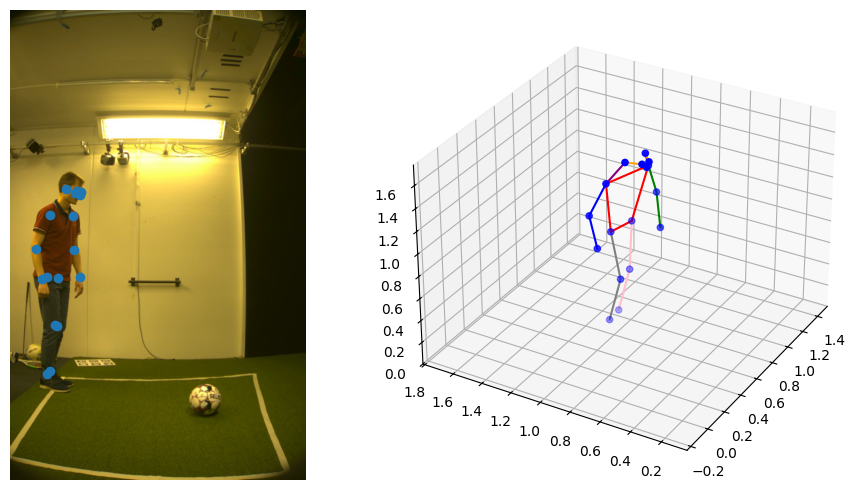

In [5]:
# plotting both 3d view and 2d reprojection
f = plt.figure(figsize=(10,5))
ax2d = f.add_subplot(1,2,1)
ax3d = f.add_subplot(1,2,2,projection="3d")
ax2d.imshow(frameRight)
ax2d.scatter(jointsRight[:, 0], jointsRight[:, 1])
ax2d.axis('off')
plot_skeleton_3d(joints3D, ax=ax3d)
plt.tight_layout()
plt.show()

In [6]:
# Example of picking sequences based off requirements
dataset_jump_indoor = SportsPoseDataset(
    data_dir=datapath,
    sample_level="video",
    seq_size=20,
    whitelist={
        "metadata": 
            {"tag":"indoors",
             "activity": "jump"},
    }
)
dataloader = torch.utils.data.DataLoader(dataset_jump_indoor, batch_size=2, shuffle=True)  

In [7]:
# Check shape of one sequence of the dataset
dataset_jump_indoor[0]["video"]["image"]["right"].shape

(20, 1936, 1216, 3)

In [8]:
# Check shape of one batch from the dataloader
sample = next(iter(dataloader))
sample["video"]["image"]["right"].shape

torch.Size([2, 20, 1936, 1216, 3])

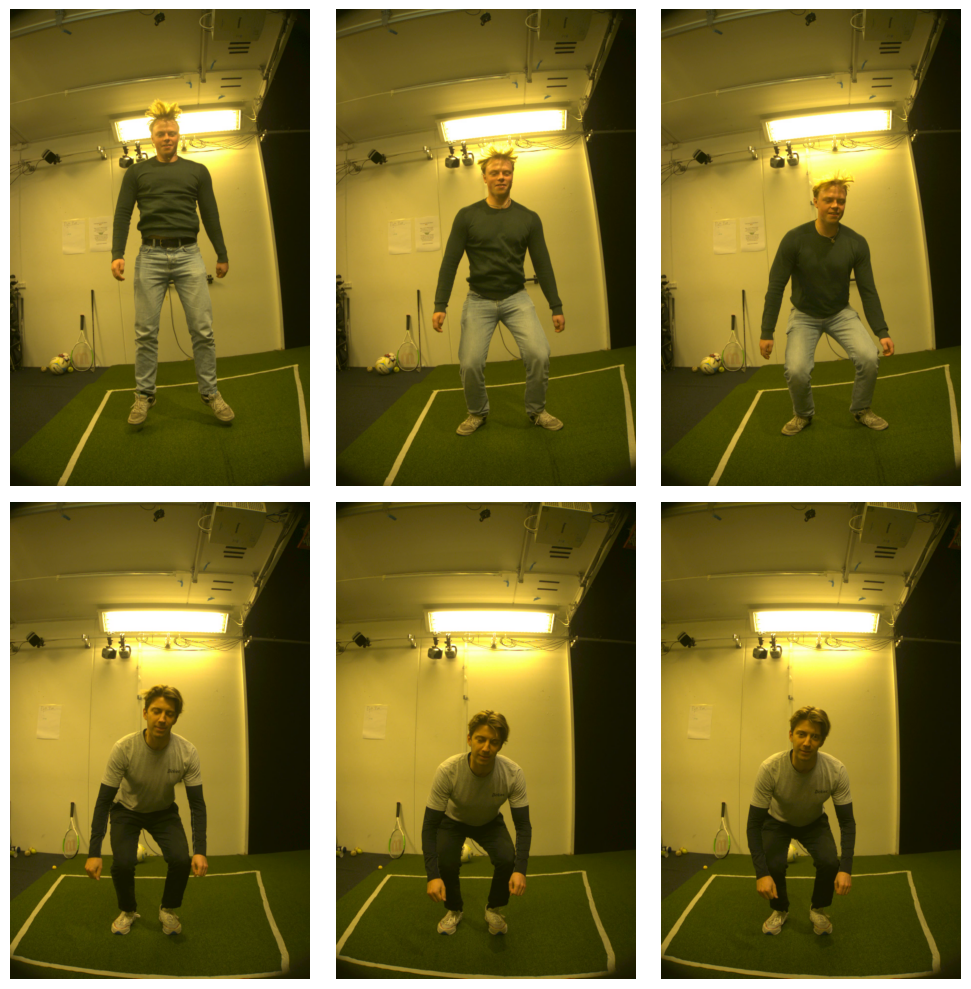

In [9]:
# Plot a few frames from the sample
f = plt.figure(figsize=(10,10))
for i, s in enumerate(sample["video"]["image"]["right"]):
    ax2d = f.add_subplot(2, 3, i*3+1)
    ax2d.imshow(s[0])
    ax2d.axis('off')
    ax2d = f.add_subplot(2, 3, i*3+2)
    ax2d.imshow(s[10])
    ax2d.axis('off')
    ax2d = f.add_subplot(2, 3, i*3+3)
    ax2d.imshow(s[19])
    ax2d.axis('off')
    
plt.tight_layout()
plt.show()

In [47]:
# Example showing multiple angles from a video

# Possible views are:
# # ["front-left", "left", "back-left", "back", "back-right", "right", "front-right"]
wanted_views = ["right", "back", "front-left"]
dataset_multiview = SportsPoseDataset(
    data_dir=datapath,
    sample_level="frame",
    seq_size=5,
    overlap_size=0,
    whitelist={
        "metadata": 
            {"tag":"outdoors",
             "activity": "soccer",
             "person_id": "S10"},
    },
    views=wanted_views,
)

# loading example from dataset
sample = dataset_multiview[20]

# load frames
frames = [sample["video"]["image"][view][0] for view in wanted_views]
# load 2D reprojections to the wanted views
joints = [sample["joints_2d"][view][0] for view in wanted_views]

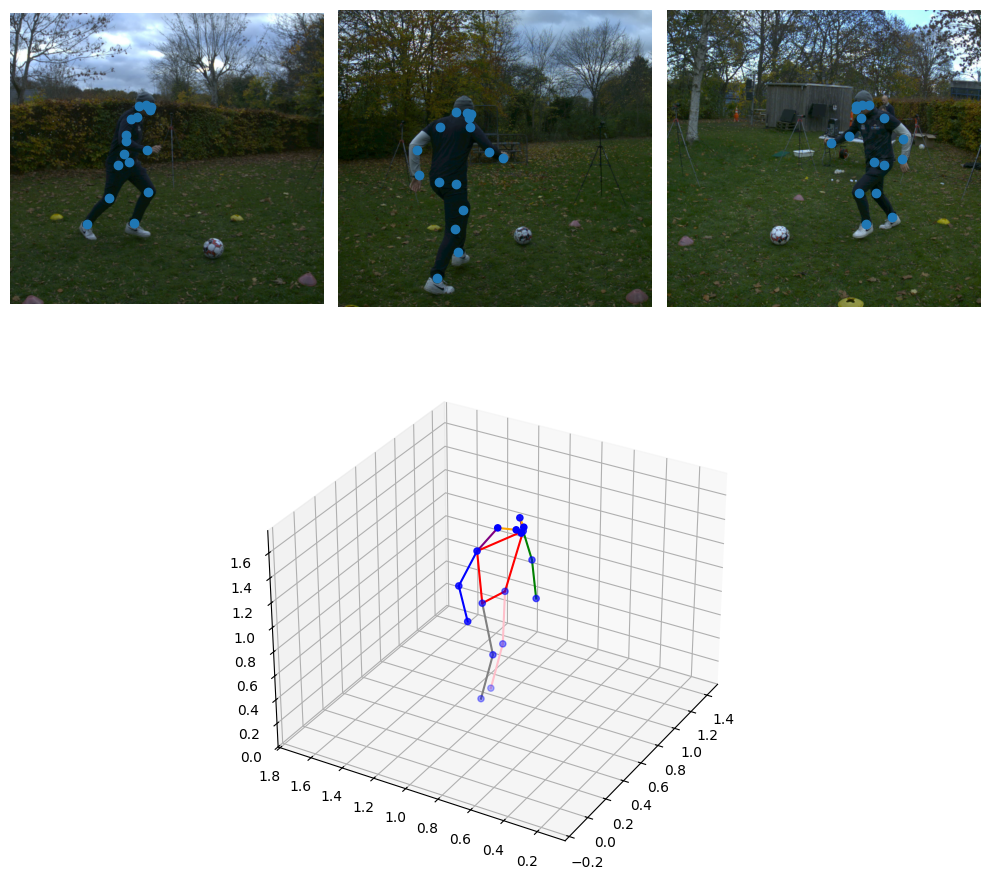

In [49]:
# plotting both 3d view and 2d reprojection
f = plt.figure(figsize=(10,10))
gs = f.add_gridspec(2,2)
ax2ds = [f.add_subplot(2,len(wanted_views),i+1) for i in range(len(wanted_views))]
for i, view in enumerate(wanted_views):
    ax2ds[i].imshow(frames[i])
    ax2ds[i].scatter(joints[i][:, 0], joints[i][:, 1])
    ax2ds[i].axis('off')
plt.tight_layout()
ax3d = f.add_subplot(gs[1,:],projection="3d")
plot_skeleton_3d(joints3D, ax=ax3d, flip_z=True)
plt.show()